In [0]:
!apt-get -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1  
!apt-get update  
!apt-get install --no-install-recommends nvidia-375  
!apt-get install --no-install-recommends nvidia-opencl-icd-375 nvidia-opencl-dev opencl-headers

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libcusparse8.0
E: Couldn't find any package by glob 'libcusparse8.0'
E: Couldn't find any package by regex 'libcusparse8.0'
E: Unable to locate package libnvrtc8.0
E: Couldn't find any package by glob 'libnvrtc8.0'
E: Couldn't find any package by regex 'libnvrtc8.0'
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:8 http://archive.ub

In [3]:
!git clone --single-branch https://github.com/minyoungg/selfconsistency

Cloning into 'selfconsistency'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (78/78), done.


In [0]:
import os
os.chdir('selfconsistency')

In [5]:
!pwd

/content/selfconsistency


In [4]:
!bash pip install -r requirements.txt

    100% |████████████████████████████████| 16.9MB 1.8MB/s 
    100% |████████████████████████████████| 24.9MB 766kB/s 
    100% |████████████████████████████████| 281.7MB 54kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x55e48fc4c000 @  0x7fd775b722a4 0x55e43e0c1f18 0x55e43e1b5a85 0x55e43e0d54ca 0x55e43e0da232 0x55e43e0d2d0a 0x55e43e0da5fe 0x55e43e0d2d0a 0x55e43e0da5fe 0x55e43e0d2d0a 0x55e43e0da5fe 0x55e43e0d2d0a 0x55e43e0dac38 0x55e43e0d2d0a 0x55e43e0da5fe 0x55e43e0d2d0a 0x55e43e0da5fe 0x55e43e0da232 0x55e43e0da232 0x55e43e0d2d0a 0x55e43e0dac38 0x55e43e0da232 0x55e43e0d2d0a 0x55e43e0dac38 0x55e43e0d2d0a 0x55e43e0dac38 0x55e43e0d2d0a 0x55e43e0da5fe 0x55e43e0d2d0a 0x55e43e0d2629 0x55e43e10361f
    100% |████████████████████████████████| 46.7MB 830kB/s 
    100% |████████████████████████████████| 12.2MB 1.9MB/s 
    100% |████████████████████████████████| 5.9MB 2.1MB/s 
dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.4.0.12 which is incompati

In [0]:
import tensorflow as tf

In [0]:
from __future__ import print_function

import time
import init_paths
import skimage.io as skio
import matplotlib.pyplot as plt
import demo

## Initialize Demo Solver

In [7]:
! chmod 755 download_model.sh && ./download_model.sh

Saving to ./ckpt/exif_final.zip
for details.

--2019-01-05 19:49:45--  http://people.eecs.berkeley.edu/~owens/consistency/exif_final.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 285403651 (272M) [application/zip]
Saving to: ‘exif_final.zip’

exif_final.zip      100%[===================>] 272.18M  2.86MB/s    in 3m 29s  

2019-01-05 19:53:15 (1.30 MB/s) - ‘exif_final.zip’ saved [285403651/285403651]

Archive:  exif_final.zip
   creating: ./ckpt/exif_final/
  inflating: ./ckpt/exif_final/exif_final.ckpt.meta  
  inflating: ./ckpt/exif_final/exif_final.ckpt.index  
  inflating: ./ckpt/exif_final/exif_final.ckpt.data-00000-of-00001  


In [8]:
# Arg: quality and num_per_dim -> tradeoffs between quality and time spent running 
# quality affects dense=False, and num_per_dim affects dense=True
ckpt_path = './ckpt/exif_final/exif_final.ckpt'
exif_demo = demo.Demo(ckpt_path=ckpt_path, use_gpu=0, quality=3.0, num_per_dim=30)

Initializing graph on gpu 0
Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Restoring parameters from ./ckpt/exif_final/exif_final.ckpt
unknown checkpoint string format ./ckpt/exif_final/exif_final.ckpt setting iteration to 0
Succesfully resuming from ./ckpt/exif_final/exif_final.ckpt
Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [10]:
from google.colab import files

uploaded = files.upload()

##files.upload returns a dictionary of the files which were uploaded. The 
##dictionary is keyed by the file name, the value is the data which was 
##uploaded.

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving normal-25.png to normal-25.png
Saving normal-24.png to normal-24.png
Saving normal-16.png to normal-16.png
Saving normal-02.png to normal-02.png
User uploaded file "normal-24.png" with length 1837085 bytes
User uploaded file "normal-16.png" with length 1102474 bytes
User uploaded file "normal-02.png" with length 846363 bytes
User uploaded file "normal-25.png" with length 1164831 bytes


## Run examples
This takes some time be patient :) 

./normal-24.png
MeanShift run time: 444.599
DBSCAN run time: 42.369


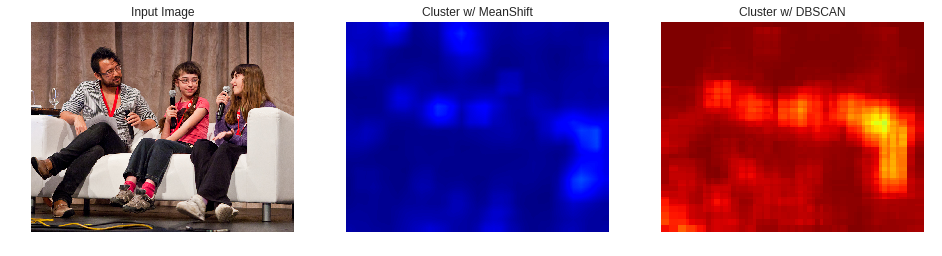

./normal-16.png
MeanShift run time: 311.570
DBSCAN run time: 26.294


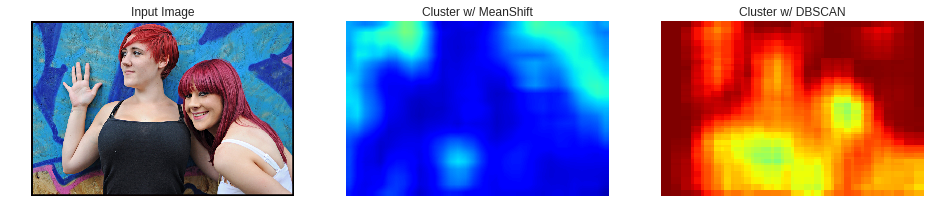

./normal-02.png
MeanShift run time: 381.417
DBSCAN run time: 18.161


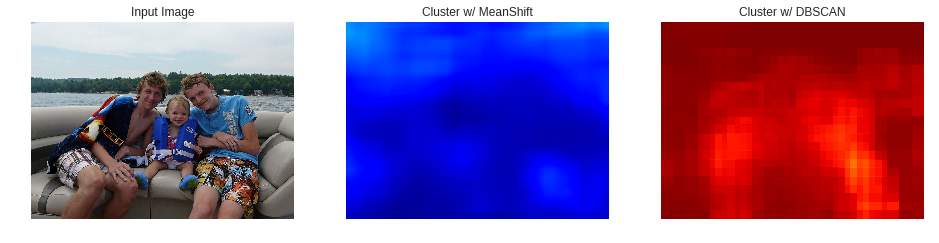

./normal-25.png
MeanShift run time: 312.425
DBSCAN run time: 27.292


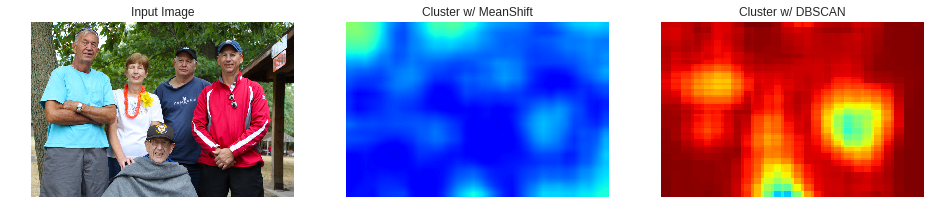

In [12]:
for fn in uploaded.keys():
  img_path = './{}'.format(fn)
  print(img_path)

  # MeanShift + dense affinities (as described in our paper)
  ms_st = time.time()
  im1, res1 = exif_demo(img_path, dense=True) # Upsampled via bilinear upsampling
  print('MeanShift run time: %.3f' % (time.time() - ms_st))

  # DBSCAN + sparse anchors
  db_st = time.time()
  im2, res2 = exif_demo(img_path, dense=False) # No upsampling
  print('DBSCAN run time: %.3f' % (time.time() - db_st))
  
  % matplotlib inline
  plt.subplots(figsize=(16, 8))
  plt.subplot(1, 3, 1)
  plt.title('Input Image')
  plt.imshow(im1)
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.title('Cluster w/ MeanShift')
  plt.axis('off')
  plt.imshow(1.0 - res1, cmap='jet', vmin=0.0, vmax=1.0)

  plt.subplot(1, 3, 3)
  plt.title('Cluster w/ DBSCAN')
  plt.axis('off')
  plt.imshow(res2, cmap='jet', vmin=0.0, vmax=1.0)

  plt.show()

MeanShift run time: 393.204
DBSCAN run time: 29.184

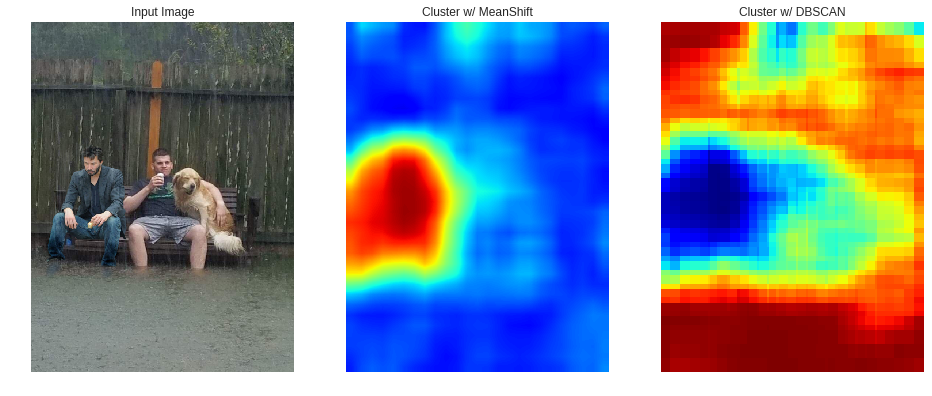

In [0]:
% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(1.0 - res1, cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Cluster w/ DBSCAN')
plt.axis('off')
plt.imshow(res2, cmap='jet', vmin=0.0, vmax=1.0)

plt.show()

## Normalized Cuts
While running the dense version, the algorithm produces a dense affinity which can be used in popular spectral clustering methods. The following code runs both the clustering with MeanShift and segmentation with N-Cuts.

In [0]:
res = exif_demo.run(im1, use_ncuts=True, blue_high=True)

% matplotlib inline
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(im1)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(res[0], cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Segment with NCuts')
plt.axis('off')
plt.imshow(res[1], vmin=0.0, vmax=1.0)

plt.show()